In [179]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from copy import deepcopy as copy
import matplotlib as plt

In [180]:
# initial cost for a tesla, currently $39k in real life, Elon promised $25k by 2022
cost_for_tesla = 39_000
# how many miles each car can operate for before being de-commisioned
tesla_longevity_miles = 350_000
# how many miles the car is operational each month 7,500 in Tesla slides
tesla_miles_per_month = 7_500
number_of_months = 20 * 12
# 0.65 in Tesla slides
profit_per_mile = 0.65
# 0.5 in Tesla slides
occupied_miles = 0.5
# change in profit each year
profit_decay_coefficient = 0.95
# change in rate of profit decay
profit_decay_decay_exponent = 0.95
# change in tesla price each year
tesla_price_increase_coefficient = 0.03
# what order of magnitude steps up operational costs (if set to 10 will do 10, 100, 1000, etc...)
magnitude_adjustment_original = 10
current_magnitude_adjustment = magnitude_adjustment_original
# change in each tesla cost when next order of magnitude is hit (simulates operational costs for business doing acquiring)
magnitude_step_change = 0.01

In [181]:

number_of_teslas = 1
cash = 0 - (number_of_teslas*cost_for_tesla)
remaining_miles = []
cash


-39000

In [182]:
total_car_lifespan_months = tesla_longevity_miles//tesla_miles_per_month
last_month_miles = tesla_longevity_miles - (total_car_lifespan_months * tesla_miles_per_month)
last_month_miles


5000

In [183]:
car_lifespan_months_dict = {}
car_lifespan_months_dict[str((total_car_lifespan_months))] = number_of_teslas

In [184]:
# currently represents total revenue, comment out this line and uncomment the line below to make it only money made afer debt is paid
total_money_earned = 0
# total_money_earned = cash
df= pd.DataFrame(columns=["Month", "Number of Teslas Owned", "Total Money Earned", "Cash"])
for x in range(0, number_of_months):
    print(x)
    # annual adjustment
    if x/12 == x//12 and x>0:
        profit_per_mile = profit_per_mile * profit_decay_coefficient
        profit_decay_coefficient = profit_decay_coefficient**profit_decay_decay_exponent
        print(f"Profit per mile has fallen to {profit_per_mile}")
        cost_for_tesla = cost_for_tesla * (1 + tesla_price_increase_coefficient)
        print(f"Cost per Tesla has risen to {cost_for_tesla}")
    money_earned_month = 0
    for key, value in car_lifespan_months_dict.items():
        if key == "0":
            money_earned_month = money_earned_month + (last_month_miles * profit_per_mile * occupied_miles * value)
        else:
            money_earned_month = money_earned_month + (tesla_miles_per_month * profit_per_mile * occupied_miles * value)
    for a in range(0, total_car_lifespan_months + 1):
        car_lifespan_months_dict[str(a)] = car_lifespan_months_dict.get(str((a+1)), 0)
    total_money_earned = total_money_earned + money_earned_month
    cash = cash + money_earned_month
    if cash>=cost_for_tesla:
        number_of_teslas_to_buy = int(cash//cost_for_tesla)
        # print(f"Number of Teslas to buy: {number_of_teslas_to_buy}")
        cash = cash - (number_of_teslas_to_buy*cost_for_tesla)
        car_lifespan_months_dict[str((total_car_lifespan_months))] = number_of_teslas_to_buy
    while sum(car_lifespan_months_dict.values()) >= current_magnitude_adjustment:
        cost_for_tesla = cost_for_tesla * (1 + magnitude_step_change)
        current_magnitude_adjustment = current_magnitude_adjustment * magnitude_adjustment_original
        print(f"You now have over {current_magnitude_adjustment/magnitude_adjustment_original} cars and the cost per Tesla has risen to {cost_for_tesla}")
    dictionary = {
        "Month": int(x+1),
        "Number of Teslas Owned": int(sum(car_lifespan_months_dict.values())),
        "Current Profit Per Mile": profit_per_mile,
        "Current Tesla Cost": cost_for_tesla,
        "Total Money Earned": total_money_earned,
        "Cash": cash
    }
    df = df.append(dictionary, ignore_index=True)
df

0
1
2
3
4
5
6
7
8
9
10
11
12
Profit per mile has fallen to 0.6174999999999999
Cost per Tesla has risen to 40170.0
13
14
15
16
17
18
19
20
21
22
23
24
Profit per mile has fallen to 0.5881314273558397
Cost per Tesla has risen to 41375.1
25
26
27
28
29
30
31
32
33
34
35
36
Profit per mile has fallen to 0.5615260915294823
Cost per Tesla has risen to 42616.353
37
38
39
40
41
42
43
44
45
46
47
48
Profit per mile has fallen to 0.5373666586920517
Cost per Tesla has risen to 43894.843590000004
49
50
51
52
53
54
55
56
57
58
59
60
Profit per mile has fallen to 0.5153786862250649
Cost per Tesla has risen to 45211.688897700005
61
62
63
64
65
66
67
68
69
70
71
72
Profit per mile has fallen to 0.4953240377394637
Cost per Tesla has risen to 46568.039564631006
73
74
75
76
77
78
79
80
81
82
83
84
Profit per mile has fallen to 0.4769954181780833
Cost per Tesla has risen to 47965.080751569934
85
86
87
88
89
90
91
92
93
94
You now have over 10.0 cars and the cost per Tesla has risen to 48444.73155908563
95

,Month,Number of Teslas Owned,Total Money Earned,Cash,Current Profit Per Mile,Current Tesla Cost
0,1.0,1.0,2.437500e+03,-36562.500000,0.650000,39000.000000
1,2.0,1.0,4.875000e+03,-34125.000000,0.650000,39000.000000
2,3.0,1.0,7.312500e+03,-31687.500000,0.650000,39000.000000
3,4.0,1.0,9.750000e+03,-29250.000000,0.650000,39000.000000
4,5.0,1.0,1.218750e+04,-26812.500000,0.650000,39000.000000
...,...,...,...,...,...,...
235,236.0,35.0,6.292299e+06,54064.547498,0.343168,69070.603431
236,237.0,35.0,6.336911e+06,29605.808177,0.343168,69070.603431
237,238.0,35.0,6.381523e+06,5147.068855,0.343168,69070.603431
238,239.0,34.0,6.426134e+06,49758.932965,0.343168,69070.603431


<Axes: xlabel='Month'>

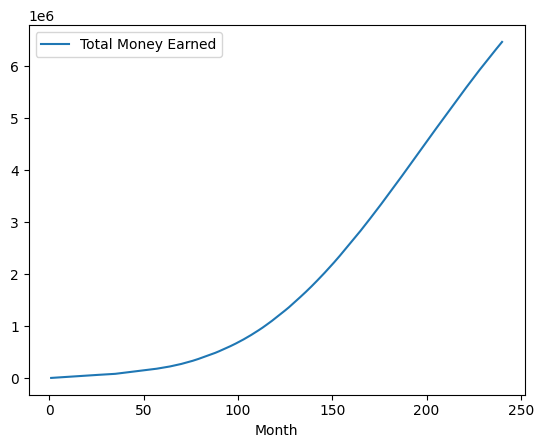

In [185]:
df.plot(y='Total Money Earned', x="Month")

df.plot(y='', x="Month")

<Axes: xlabel='Month'>

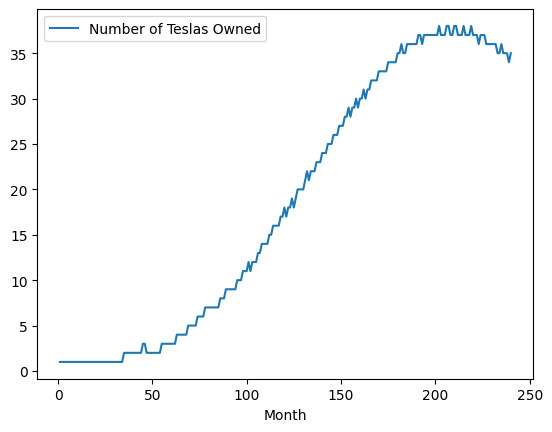

In [186]:
df.plot(y='Number of Teslas Owned', x="Month")

<Axes: xlabel='Month'>

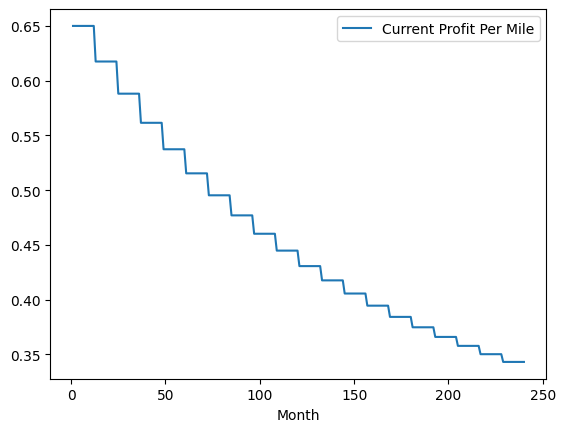

In [187]:
df.plot(y='Current Profit Per Mile', x="Month")

<Axes: xlabel='Month'>

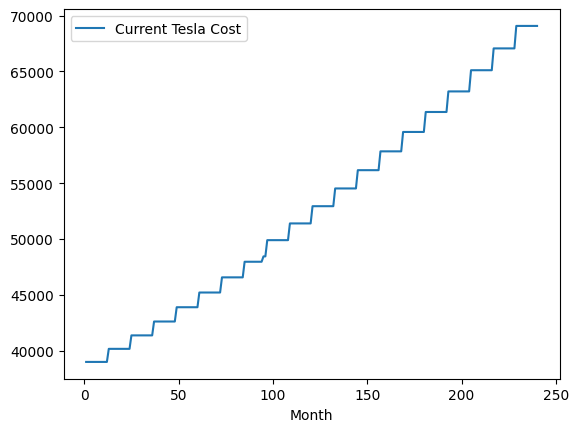

In [188]:
df.plot(y='Current Tesla Cost', x="Month")

In [189]:
# df.to_csv('robotaxi_analysis_twitter_vector.csv', index=False)